# Ecuación de Laplace

## Ecuación de flujo para un medio homogéneo isotrópico

## Objetivos

### Objetivo general

- Encontar generar una simulación de una placa (o alguna superfice 2D) cuyo comportamiento se rige por la la ecuación de laplace en dos dimensiones:

$$ \dfrac{\partial^2 f}{\partial x^2} + \dfrac{\partial^2 f}{\partial y^2} = 0$$

- Graficar cómo un Heatmap el resultado de la simulación, en dónde se pueda analizar los resultados de una manera visual.

### Objetivos particulares

- Poder leer un archivo de entrada para no preguntarle tantas cosas al usuario.
- Aplicar la ecuación de diferencias para la resolución de ecuaciones diferencias parciales
- Generar un plot 3D para poder ver cómo se comporta la superficie 2D.
- Que el programa pueda determinar por si solo la cantidad de ciclos necesarios para llegar a la convergencia.
- Guardar los datos simulados en un archivo excel para futuros análisis.

## Modelo que representa el sistema

Se presenta a continuación la ecuación de laplace:

$$ \dfrac{\partial^2 f}{\partial x^2} + \dfrac{\partial^2 f}{\partial y^2} = 0$$

Esta ecuación aparece cuando se quieren calcular redes de flujo, algunas aplicaciones son:

- El cálculo de flujo hidráulico en un suelo isotrópico.

En este sistema el flujo depende solamente de la configuración de las condiciones de frontera.

- Cálculo del flujo del potencial en un papel conductor.

- Cálculo del flujo de la corriente en una red de resistencias.

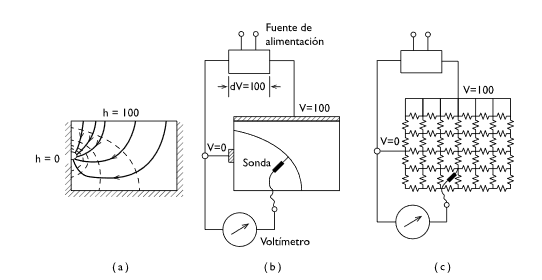


La limitación de este modelo es que solo funciona para suelos isotrópicos, pero con una pequeña modificación al código se pueden agregar las constantes para el suelo anisotrópico.

Otra limitación es que por el uso del while la simulación puede durar mucho, y mas si la malla es muy grande.

La ecuación de diferencias toma la siguiente forma:

$$ \dfrac{T^j_{i+1}+T^j_{i-1}-2T^j_{i}}{a^2}+\dfrac{T^{j+1}_{i}+T^{j-1}_{i}-2T^j_{i}}{a^2}=0$$

Despejamos $T^j_{i}$

$$ T^j_{i}=\dfrac{1}{2}(\dfrac{1}{a^2}+\dfrac{1}{b^2})^{-1}(\dfrac{T^j_{i+1}+T^j_{i-1}}{a^2}++\dfrac{T^{j+1}_{i}+T^{j-1}_{i}}{b^2} )$$

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
sns.set()

## Leemos los datos del excel con las temperaturas iniciales

In [178]:
data=pd.read_excel("input.xlsx")
data.head()

x_largo  y_largo  puntos_x  puntos_y  x0_1  x0_2  y0_1  y0_2
0       10       10        10        10     0    10     0     5

In [227]:
A=data.x_largo[0]
B=data.y_largo[0]
puntos_x=data.puntos_x[0]
puntos_y=data.puntos_y[0]

In [228]:
columns=np.around(np.linspace(0,A,data.puntos_x[0]),decimals=2)
index=np.around(np.linspace(0,B,data.puntos_y[0]),decimals=2)

In [229]:
X=np.zeros((puntos_x,puntos_y))
X[0]=np.ones(puntos_x)*data.y0_1[0]
X[-1]=np.ones(puntos_x)*data.y0_2[0]
X[:,0]=np.ones(puntos_y)*data.x0_1[0]
X[:,-1]=np.ones(puntos_y)*data.x0_2[0]

In [230]:
matrix=pd.DataFrame(X,columns=columns,index=index)

In [231]:
a=float(1/A)
b=float(1/B)

## Simulaciones

La ventaja de este modelo es que las condiciones iniciales pueden ser cualquiera con tal de que sean números reales, y para este caso no existen parámetros a variar en la ecuación.

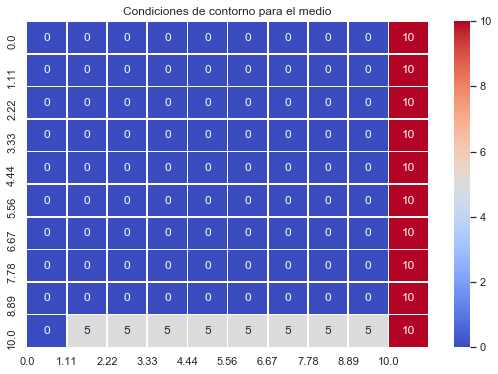

In [232]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, annot=True, linewidths=.5, ax=ax,cmap="coolwarm")
ax.set_xticks(np.arange(np.shape(X)[1]));
ax.set_title("Condiciones de contorno para el medio");

In [238]:
Y=np.ones(np.shape(X))

In [239]:
while np.sum(X-Y)>.001: #Se detiene cuando la diferencia entre dos iteraciones es menor a .001
    Y=np.copy(X) #Copiamos el X para tener una referencia del paso anterior
    for y in range(1,puntos_y-1):
        for x in range(1,puntos_x-1): # Aplicamos la ecuación de diferencias
            X[y][x]=(1/((1/a**2)+(1/b**2)))*((1/(2*(a**2)))*(X[y][x+1]+X[y][x-1])+(1/(2*(b**2)))*(X[y+1][x]+X[y-1][x]))

In [240]:
Y=pd.DataFrame(X,columns=columns,index=index)

## Visualización de los resultados de la simulación

### Heatmap de la simulación con valores encontrados

In [246]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(Y, annot=True, linewidths=.5, ax=ax,cmap="coolwarm")
ax.set_xticks(np.arange(np.shape(Y)[1]));
ax.set_title("Distribución del potencial en el medio isotrópico");

In [242]:
Y.to_excel("Resultados_simulacion.xlsx")

In [243]:
X2, Y2 = np.meshgrid(np.linspace(0,A,puntos_x), np.linspace(0,B,puntos_y))
Z2=Y.values

### Gráfico 3D en dónde se puede ver a dónde deducir el flujo y se muestran las curvas equipotenciales

Las curvas equipotenciales nos dicen las zonas en las cuales la altura o el potencial  es el mismo

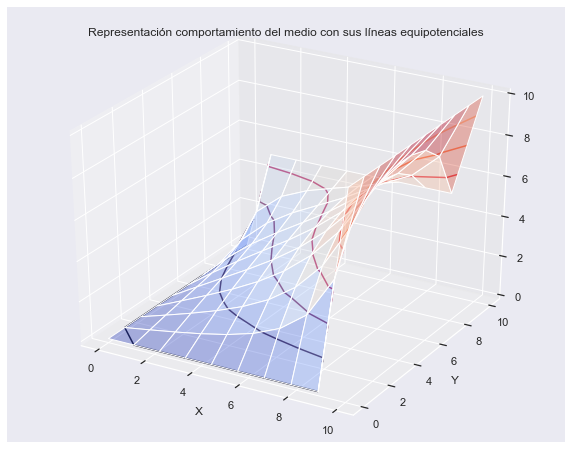

In [245]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X2, Y2, Z2, cmap='coolwarm',alpha=.4)
ax.contour(X2,Y2,Z2)
ax.set_title("Representación comportamiento del medio con sus líneas equipotenciales");
ax.set_xlabel("X")
ax.set_ylabel("Y");

## Conclusiones

- Este modelo es eficiente para la resolución de la ecuación diferencial parcial de Laplace
- El modelo se aplica en mécanica de suelos, por lo cual es relevante para nuestra carrera
- Los gráficos nos permiten predecir el comportamiento de los flujos a través del medio

## Referencias

- https://es.slideshare.net/melitayura/mecanica-de-suelos-propiedades-hidraulicas-del-suelo
- http://hydrogeologistswithoutborders.org/wordpress/1979-espanol/capitulo-5/
- http://jacobi.fis.ucm.es/pparanda/EDPdf/apM2/m24.pdf